In [1]:
ENV["JULIA_PKG_SERVER"] = ""
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms

  Activating project at `~/Documents/GitHub/Imbalance.jl/examples`


### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

type="ColTable"
num_rows = 100
num_features = 2
class_probs = [0.5, 0.2, 0.3]
y_ind = 3

Xy, _ = generate_imbalanced_data(num_rows, num_features; min_sep=0.1,  class_probs, type, insert_y=y_ind, rng=32)
X, y = generate_imbalanced_data(num_rows, num_features; min_sep=0.1, class_probs, type, rng=32)

((Column1 = [0.252, 0.195, 0.374, 0.075, 0.067, 0.247, 0.168, 0.305, -0.305, 0.357  …  0.579, 0.081, 0.204, -0.049, 0.343, 0.025, -0.587, 0.181, 0.093, 0.364], Column2 = [0.492, 0.282, 0.503, 0.423, 0.833, 0.919, 0.689, 0.166, 0.445, 0.071  …  0.132, 0.091, 0.61, 0.013, -0.006, 0.254, 0.359, 0.96, 0.816, 0.476]), CategoricalValue{Int64, UInt32}[1, 1, 0, 0, 1, 1, 1, 0, 0, 2  …  2, 2, 1, 2, 2, 0, 0, 1, 0, 0])

### 2. Apply BorderlineSMOTE1

#### Using Imbalance Only

In [3]:
Xover, yover = borderline_smote1(X, y; m=5, k=5, ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.0), rng = 42)

┌ Info: After filtering, the mapping from each class to number of borderline points is (0 => 7, 2 => 1, 1 => 5).
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/oversampling_methods/borderline_smote1/borderline_smote1.jl:129


Progress:  67%|███████████████████████████▍             |  ETA: 0:00:00



Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  class:  2


((Column1 = [0.252, 0.195, 0.374, 0.075, 0.067, 0.247, 0.168, 0.305, -0.305, 0.357  …  -0.02996874414384365, -0.07592210918664932, -0.029451357200741768, -0.024654459208250046, -0.030597316101193428, -0.030283330008387566, -0.055360570549964905, 0.08942994475364685, -0.048253584653139114, 0.01769392192363739], Column2 = [0.492, 0.282, 0.503, 0.423, 0.833, 0.919, 0.689, 0.166, 0.445, 0.071  …  0.15544530749320984, 0.10611683875322342, 0.15453986823558807, 0.146145299077034, 0.16253674030303955, 0.16233547031879425, 0.13695913553237915, 0.10995683073997498, 0.021784713491797447, 0.14200909435749054]), CategoricalValue{Int64, UInt32}[1, 1, 0, 0, 1, 1, 1, 0, 0, 2  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Using MLJ

In [4]:
smote_model = Imbalance.MLJ.BorderlineSMOTE1(m = 5, k = 5, ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.0), rng=42)
mach = machine(smote_model)
Xover, yover = transform(mach, X, y)

┌ Info: After filtering, the mapping from each class to number of borderline points is (0 => 7, 2 => 1, 1 => 5).
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/oversampling_methods/borderline_smote1/borderline_smote1.jl:129


((Column1 = [0.252, 0.195, 0.374, 0.075, 0.067, 0.247, 0.168, 0.305, -0.305, 0.357  …  -0.02996874414384365, -0.07592210918664932, -0.029451357200741768, -0.024654459208250046, -0.030597316101193428, -0.030283330008387566, -0.055360570549964905, 0.08942994475364685, -0.048253584653139114, 0.01769392192363739], Column2 = [0.492, 0.282, 0.503, 0.423, 0.833, 0.919, 0.689, 0.166, 0.445, 0.071  …  0.15544530749320984, 0.10611683875322342, 0.15453986823558807, 0.146145299077034, 0.16253674030303955, 0.16233547031879425, 0.13695913553237915, 0.10995683073997498, 0.021784713491797447, 0.14200909435749054]), CategoricalValue{Int64, UInt32}[1, 1, 0, 0, 1, 1, 1, 0, 0, 2  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Using TableTransforms

In [5]:
using Imbalance: TableTransforms.BorderlineSMOTE1
smote_model_t = BorderlineSMOTE1(y_ind, m=5, k=5, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.0), rng=42)
Xyover = Xy |> smote_model_t

┌ Info: After filtering, the mapping from each class to number of borderline points is (0.0 => 7, 2.0 => 1, 1.0 => 5).
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/oversampling_methods/borderline_smote1/borderline_smote1.jl:129


Progress:  67%|███████████████████████████▍             |  ETA: 0:00:00



Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  class:  2.0


(Column1 = [0.252, 0.195, 0.374, 0.075, 0.067, 0.247, 0.168, 0.305, -0.305, 0.357  …  -0.02996874414384365, -0.07592210918664932, -0.029451357200741768, -0.024654459208250046, -0.030597316101193428, -0.030283330008387566, -0.055360570549964905, 0.08942994475364685, -0.048253584653139114, 0.01769392192363739],
 Column2 = [0.492, 0.282, 0.503, 0.423, 0.833, 0.919, 0.689, 0.166, 0.445, 0.071  …  0.15544530749320984, 0.10611683875322342, 0.15453986823558807, 0.146145299077034, 0.16253674030303955, 0.16233547031879425, 0.13695913553237915, 0.10995683073997498, 0.021784713491797447, 0.14200909435749054],
 Column3 = [1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 2.0  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0],)

### 3. Plot the Results

    Updating registry at `~/.julia/registries/General`


    Updating git-repo `https://github.com/JuliaRegistries/General.git`


   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Manifest.toml`


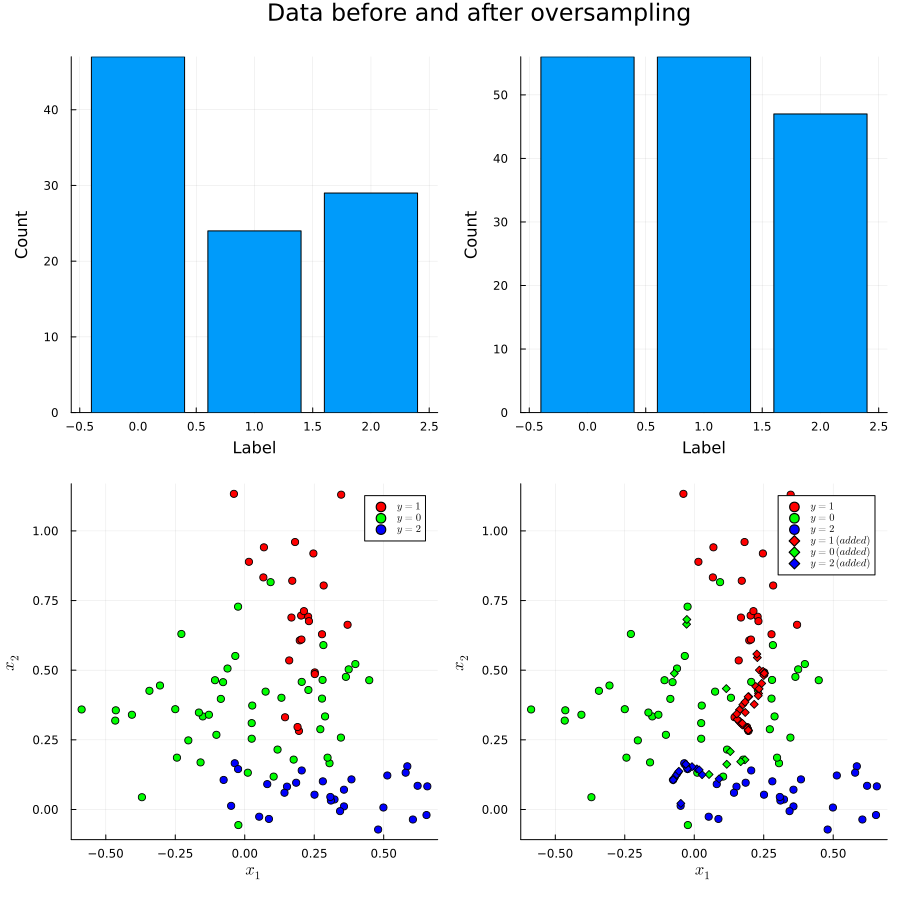

In [6]:
include("plot.jl")                      # provides a plot function to compare results
plot_data(y, yover, X, Xover)